In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import math
from collections import Counter
from xgboost import XGBClassifier

# Scratch

In [2]:
filepath = r"d:\User\Desktop\GT\jupyter\Diabetes\diabetes.csv"
columns = ['Pregnancies','Glucose','Blood Pressure','Skin thickness','Insulin','BMI','DPF(Diabetes Pedigree Function)','Age','Outcome']
data = pd.read_csv(filepath,names=columns,na_values='?')
data = data.iloc[1:]
data=data.dropna()
data

,Pregnancies,Glucose,Blood Pressure,Skin thickness,Insulin,BMI,DPF(Diabetes Pedigree Function),Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
764,10,101,76,48,180,32.9,0.171,63,0
765,2,122,70,27,0,36.8,0.34,27,0
766,5,121,72,23,112,26.2,0.245,30,0
767,1,126,60,0,0,30.1,0.349,47,1


In [3]:
y=np.array(data.iloc[:,-1],dtype=float)
y=y[1:]

y

array([0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1.,
       0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0.,
       0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0.,
       1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1.,
       1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1.,
       1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       0., 0., 0., 0., 0.

In [4]:
x=np.array(data.iloc[:,:-1],dtype=float)
x=x[1:]
x = (x - np.mean(x, axis=0)) / np.std(x, axis=0)
x

array([[-0.84372629, -1.12208597, -0.16024856, ..., -0.68372895,
        -0.36426474, -0.18894038],
       [ 1.23423997,  1.94447577, -0.26357823, ..., -1.10230105,
         0.60470064, -0.1037951 ],
       [-0.84372629, -0.99692019, -0.16024856, ..., -0.49346891,
        -0.91968415, -1.0403932 ],
       ...,
       [ 0.343683  ,  0.0044061 ,  0.14974046, ..., -0.73446496,
        -0.68423462, -0.27408566],
       [-0.84372629,  0.16086333, -0.47023757, ..., -0.23978884,
        -0.37030191,  1.17338414],
       [-0.84372629, -0.8717544 ,  0.04641078, ..., -0.20173684,
        -0.47293375, -0.87010264]], shape=(767, 8))

In [5]:
def logisregress(x,y,w,b,lr,iterations):
    m,n=x.shape
    cost=[]
    for i in range(iterations):
        z=np.dot(x,w)+b
        fx = 1/(1 + np.exp(-z))
        loss = -np.mean(y*np.log(fx) + (1-y)*np.log(1-fx))
        dw = np.dot(x.T,(fx-y))/m
        db = np.mean(fx-y)
        w = w - lr*dw
        b = b - lr*db
        cos = cost_calc(x,y,w,b,fx)
        cost.append(cos)
    fx = (fx>=0.5).astype(int)
    return w,b,cost,fx

In [6]:
def cost_calc(x,y,w,b,fx):
    cost = -np.mean(y*np.log(fx) + (1-y)*np.log(1-fx))
    return cost

Weight calculated: [ 0.34375495  1.00357288 -0.09538611 -0.00794553 -0.00157483  0.5860742
  0.28042259  0.20962321]
Bias calculated: -0.8268852332200872


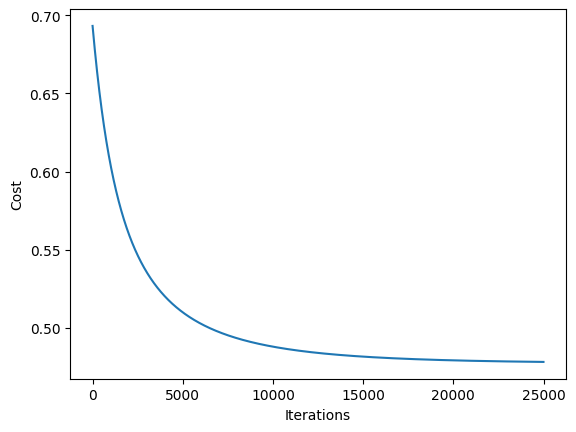

Accuracy: 0.8181818181818182
Precision: 0.8372093023255814
Recall: 0.631578947368421
F1 Score: 0.72
Confusion Matrix: 
 [[90  7]
 [21 36]]


In [7]:
def main():
    lr = 0.001
    iterations = 25000
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    
    w = np.zeros(X_train.shape[1])
    b = 0

    w, b, cost, train_preds = logisregress(X_train, y_train, w, b, lr, iterations)

    print(f"Weight calculated: {w}")
    print(f"Bias calculated: {b}")
    
    plt.plot(range(iterations),cost)
    plt.xlabel("Iterations")
    plt.ylabel("Cost")
    plt.show()

    z_test = np.dot(X_test, w) + b
    fx_test = 1 / (1 + np.exp(-z_test))
    y_pred_test = (fx_test >= 0.55).astype(int)
    
    print("Accuracy:", accuracy_score(y_test, y_pred_test))
    print("Precision:", precision_score(y_test, y_pred_test))
    print("Recall:", recall_score(y_test, y_pred_test))
    print("F1 Score:", f1_score(y_test, y_pred_test))
    print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred_test))
    
main()

**Using Scikit Learn**


In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [9]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8116883116883117
Precision: 0.7916666666666666
Recall: 0.6666666666666666
F1 Score: 0.7238095238095238
Confusion Matrix:
 [[87 10]
 [19 38]]


In [10]:
print("Weights: ", model.coef_) 
print("Bias: ", model.intercept_) 

Weights:  [[ 0.36872827  1.08592142 -0.1396258   0.00347923 -0.04683199  0.63931347
   0.29049265  0.19648053]]
Bias:  [-0.86749898]


# Decision Trees

**Scratch**

In [11]:
def entropy(y):
    counts = Counter(y)
    total = len(y)
    ent = 0
    for label in counts:
        p = counts[label] / total
        ent -= p * math.log2(p)
    return ent

def information_gain(parent_y, left_y, right_y):
    p = len(left_y) / len(parent_y)
    return entropy(parent_y) - (p * entropy(left_y) + (1 - p) * entropy(right_y))

In [24]:
def best_split(X, y):
    best_gain = -float('inf')
    best_feature = None
    best_threshold = None

    n_features = len(X[0])

    for feature_idx in range(n_features):
        values = sorted(set([x[feature_idx] for x in X]))
        if len(values) < 2:
            continue
        thresholds = [(values[i] + values[i+1]) / 2 for i in range(len(values) - 1)]

        for t in thresholds:
            left_y = [y[i] for i in range(len(X)) if X[i][feature_idx] <= t]
            right_y = [y[i] for i in range(len(X)) if X[i][feature_idx] > t]

            if not left_y or not right_y:
                continue

            gain = information_gain(y, left_y, right_y)
            if gain > best_gain:
                best_gain = gain
                best_feature = feature_idx
                best_threshold = t

    return best_feature, best_threshold


In [13]:
class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        self.feature = feature          
        self.threshold = threshold      
        self.left = left                
        self.right = right              
        self.value = value              

    def is_leaf(self):
        return self.value is not None

In [25]:
def build_tree(X, y, depth=0, max_depth=5):
    if len(set(y)) == 1:
        return Node(value=y[0])

    if depth >= max_depth or len(X) == 0:
        majority = Counter(y).most_common(1)[0][0]
        return Node(value=majority)

    best_feature, threshold = best_split(X, y)
    if threshold is None or best_feature is None:
        majority = Counter(y).most_common(1)[0][0]
        return Node(value=majority)

    left_idx = [i for i in range(len(X)) if X[i][best_feature] <= threshold]
    right_idx = [i for i in range(len(X)) if X[i][best_feature] > threshold]

    left_X = [X[i] for i in left_idx]
    right_X = [X[i] for i in right_idx]
    left_y = [y[i] for i in left_idx]
    right_y = [y[i] for i in right_idx]

    left_node = build_tree(left_X, left_y, depth + 1, max_depth)
    right_node = build_tree(right_X, right_y, depth + 1, max_depth)

    return Node(feature=best_feature, threshold=threshold, left=left_node, right=right_node)


In [26]:
def predict(node, x):
    if node.is_leaf():
        return node.value
    if x[node.feature] <= node.threshold:
        return predict(node.left, x)
    else:
        return predict(node.right, x)

In [27]:
def main():
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    tree2 = build_tree(X_train,y_train,max_depth=5)

    y_pred_test = [predict(tree2, x) for x in X_test]
    y_pred_test2 = [predict(tree2, x) for x in X_train]

    print("Scratch Evaluation matrices: ")
    print("Accuracy:", accuracy_score(y_test, y_pred_test))
    print("Precision:", precision_score(y_test, y_pred_test))
    print("Recall:", recall_score(y_test, y_pred_test))
    print("F1 Score:", f1_score(y_test, y_pred_test))
    print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred_test))

    clf = tree.DecisionTreeClassifier()
    clf.fit(X_train,y_train)    
    clfpred = clf.predict(X_test)
    print("\nScikit Learn Evaluation matrices: ")
    print("SL Accuracy:", accuracy_score(y_test, clfpred))
    print("SL Precision:", precision_score(y_test, clfpred))
    print("SL Recall:", recall_score(y_test, clfpred))
    print("SL F1:", f1_score(y_test, clfpred))
    print("Confusion Matrix: \n", confusion_matrix(y_test, clfpred))
    
    rf = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_test)
    print("\nRandom Forest Evaluation matrices: ")
    print("RF Accuracy:", accuracy_score(y_test, y_pred))
    print("RF Precision:", precision_score(y_test, y_pred))
    print("RF Recall:", recall_score(y_test, y_pred))
    print("RF F1:", f1_score(y_test, y_pred))
    print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

    model = XGBClassifier()
    model.fit(X_train,y_train)
    y_pred2= model.predict(X_test)
    print("\nXGBoost Evaluation matrices: ")
    print("XG Accuracy:", accuracy_score(y_test, y_pred2))
    print("XG Precision:", precision_score(y_test, y_pred2))
    print("XG Recall:", recall_score(y_test, y_pred2))
    print("XG F1:", f1_score(y_test, y_pred2))
    print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred2))

    
main()

Scratch Evaluation matrices: 
Accuracy: 0.7597402597402597
Precision: 0.6851851851851852
Recall: 0.6491228070175439
F1 Score: 0.6666666666666666
Confusion Matrix: 
 [[80 17]
 [20 37]]

Scikit Learn Evaluation matrices: 
SL Accuracy: 0.6948051948051948
SL Precision: 0.578125
SL Recall: 0.6491228070175439
SL F1: 0.6115702479338843
Confusion Matrix: 
 [[70 27]
 [20 37]]

Random Forest Evaluation matrices: 
RF Accuracy: 0.7857142857142857
RF Precision: 0.7142857142857143
RF Recall: 0.7017543859649122
RF F1: 0.7079646017699115
Confusion Matrix: 
 [[81 16]
 [17 40]]

XGBoost Evaluation matrices: 
XG Accuracy: 0.7922077922077922
XG Precision: 0.6923076923076923
XG Recall: 0.7894736842105263
XG F1: 0.7377049180327869
Confusion Matrix: 
 [[77 20]
 [12 45]]
